#  Exploratory Data Analysis on Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

df = pd.read_csv('Titanic Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 1: Explore Data Types & Missing Values

In [2]:
df.info()
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

## Step 2: Data Cleaning

In [3]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Simplify Cabin: keep only the first letter, fill missing as 'U' (Unknown)
df['Cabin'] = df['Cabin'].fillna('U').apply(lambda x: x[0])

# Drop Ticket and Name (not useful for this analysis)
df.drop(['Ticket','Name'], axis=1, inplace=True)

## Step 3: Encode Categorical Variables

In [4]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked','Cabin'], drop_first=True)

## Step 4: Summary Statistics

In [5]:
print(df.describe())

# Survival rate by gender
print("\nSurvival rate by gender:\n", df.groupby('Sex')['Survived'].mean())

# Survival rate by class
print("\nSurvival rate by class:\n", df.groupby('Pclass')['Survived'].mean())


       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 8 columns]

Survival rate by gender:
 Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Survival rate by class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Step 5: Visualizations

### 1. Survival by Gender

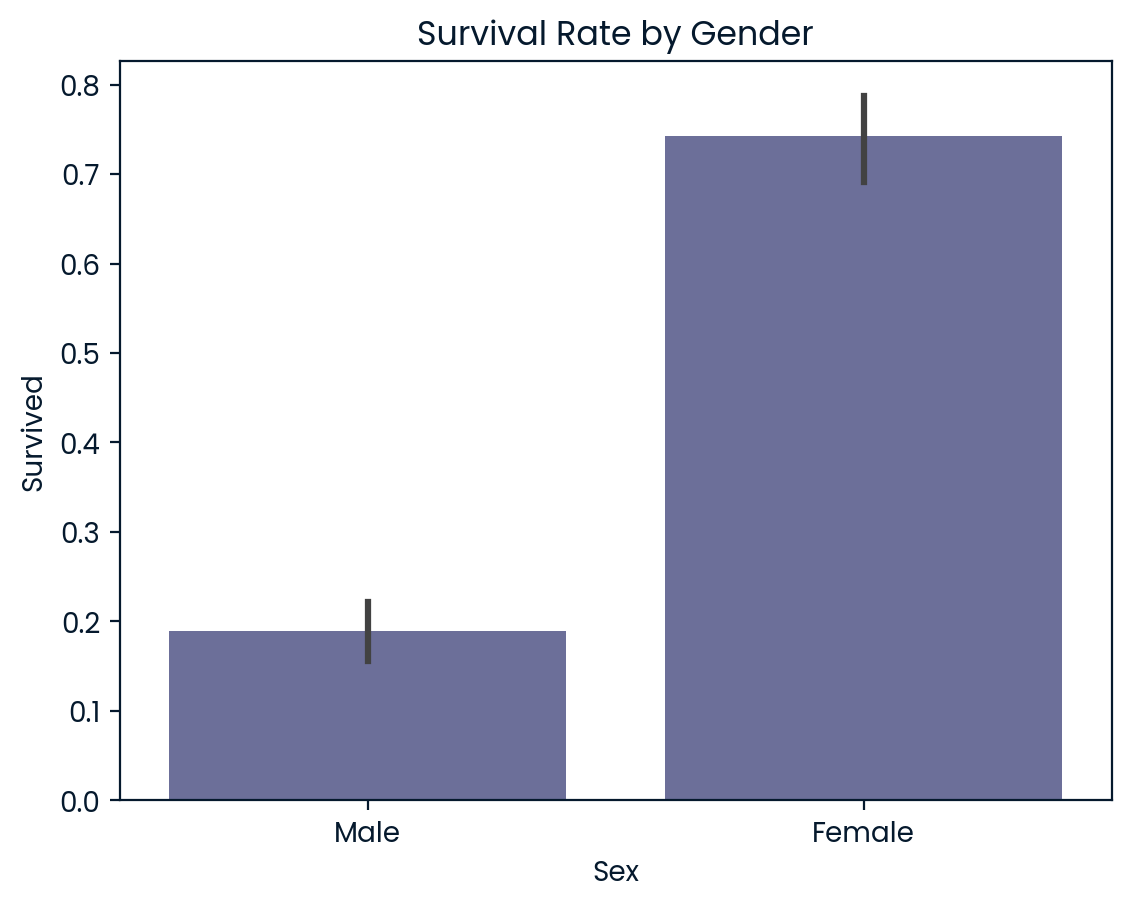

In [6]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.xticks([0,1], ['Male','Female'])
plt.title("Survival Rate by Gender")
plt.show()


_Insight: Females had a survival rate of ~74%, while males had only ~19%._

### 2. Survival by Passenger Class

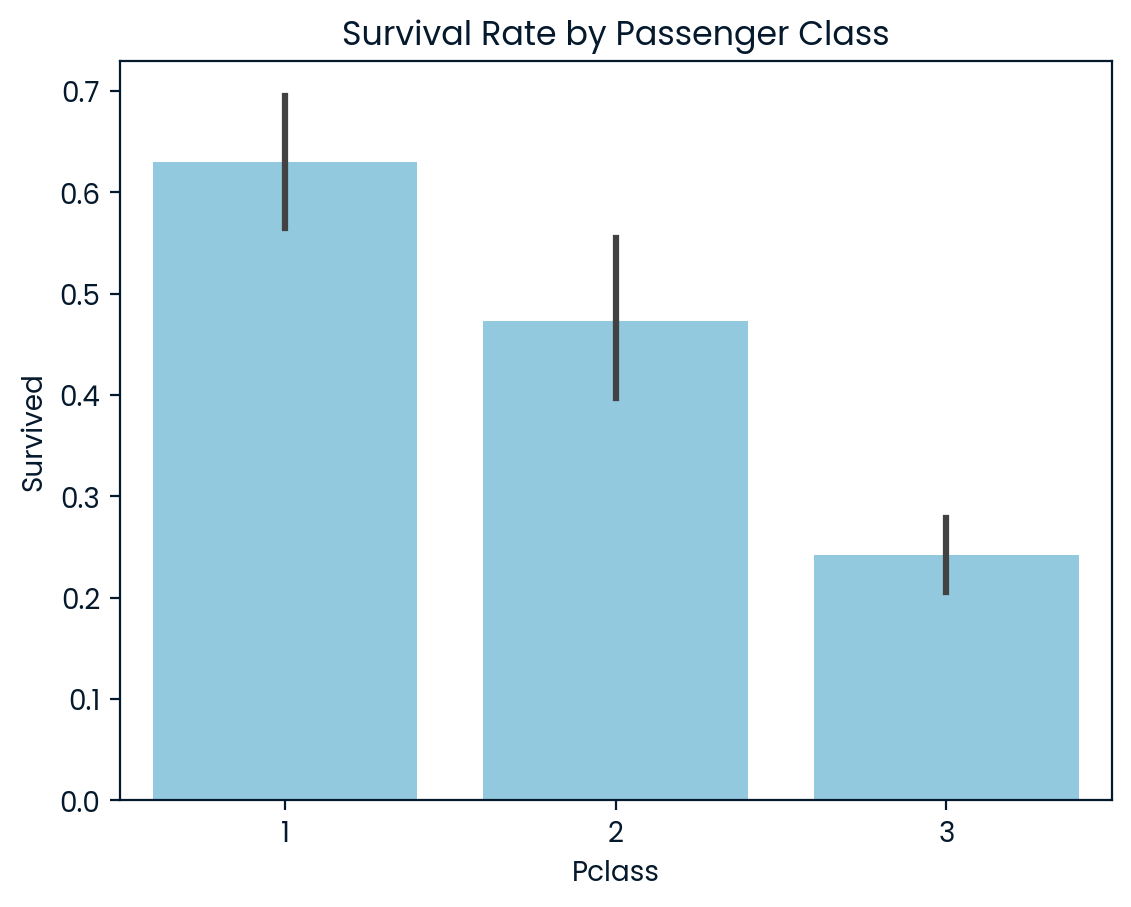

In [7]:
sns.barplot(x='Pclass', y='Survived', data=df, color="skyblue")
plt.title("Survival Rate by Passenger Class")
plt.show()


_Insight: 1st class passengers survived the most (~63%), while 3rd class had the lowest (~24%)._

### 3. Age Distribution by Survival

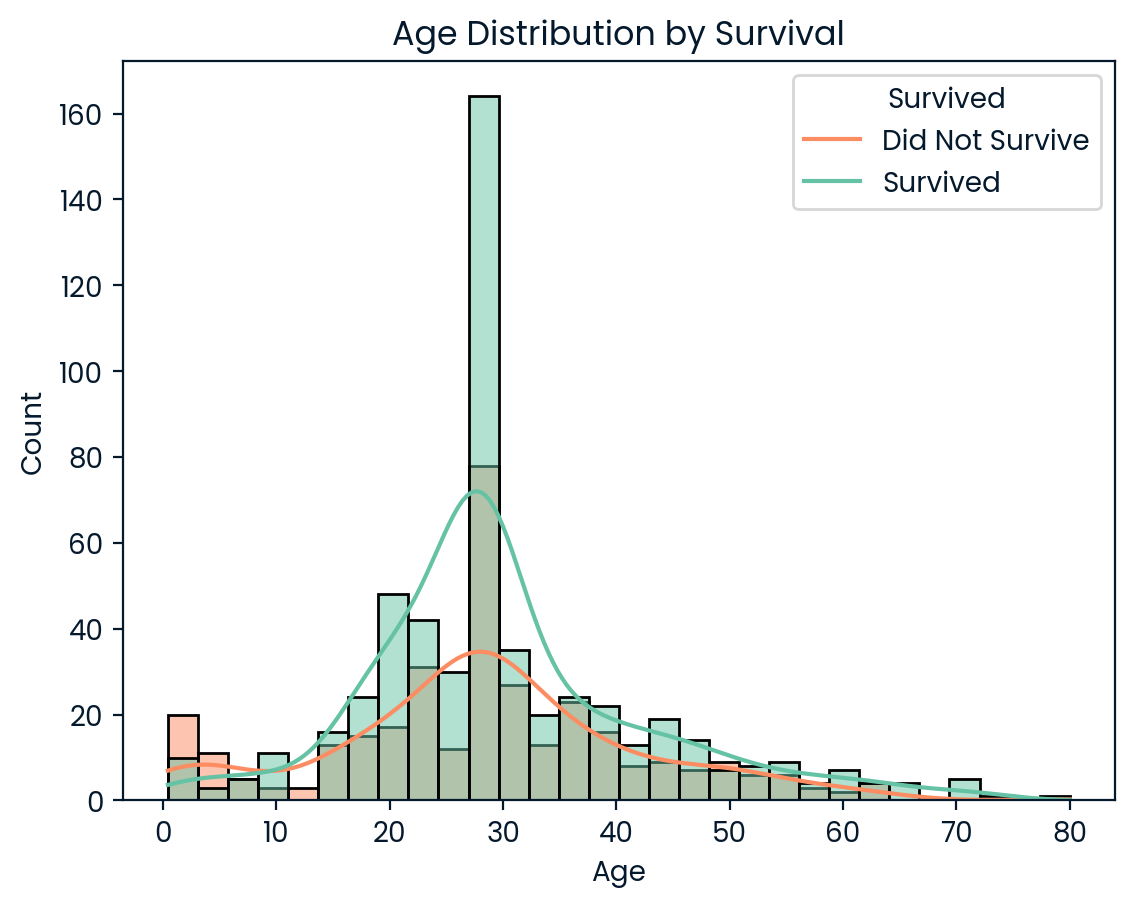

In [8]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='Set2')
plt.title("Age Distribution by Survival")
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

_insight: The plot shows that **children had the highest survival chances**, survival was mixed for young and middle-aged adults (20–40), and elderly passengers (50+) had the lowest survival rates. Most passengers were in their 20s–30s, but survival was less favorable in this group compared to children._

### 4. Fare vs Survival

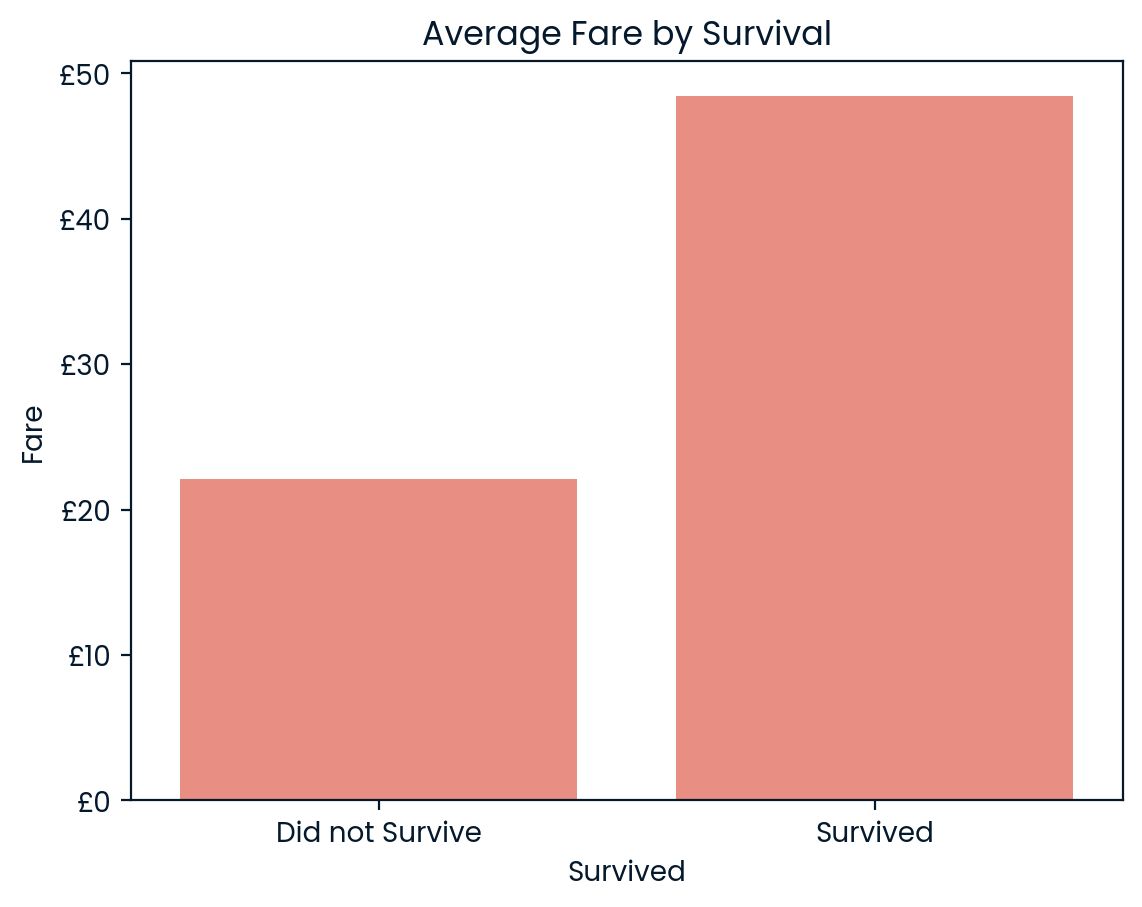

In [9]:
import matplotlib.ticker as mtick

sns.barplot(x='Survived', y='Fare', data=df, ci=None, color= "salmon")
plt.xticks([0,1], ['Did not Survive','Survived'])
plt.title("Average Fare by Survival")

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("£{x:,.0f}"))
plt.show()


_Insight: Survivors paid higher average fares than non-survivors, suggesting higher-class passengers had better chances._

### 5. Survival by Family (SibSp + Parch)

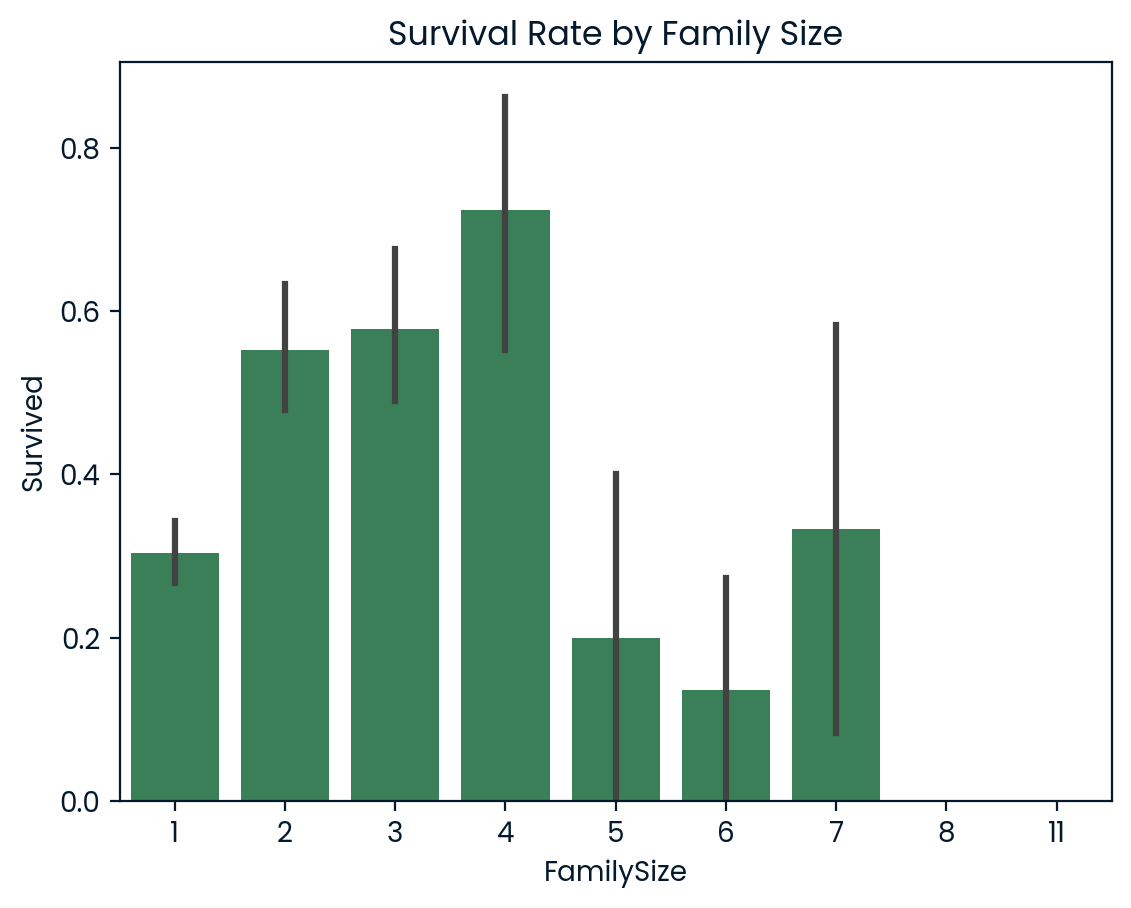

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df, color="seagreen")
plt.title("Survival Rate by Family Size")
plt.show()


_Insight: Passengers with small families (2–4 members) had higher survival rates. Alone passengers and large families had lower survival._

### 6. Correlation Heatmap

      Sex Sex_label  Sex_num
0    male      male        0
1  female    female        1
2  female    female        1
3  female    female        1
4    male      male        0


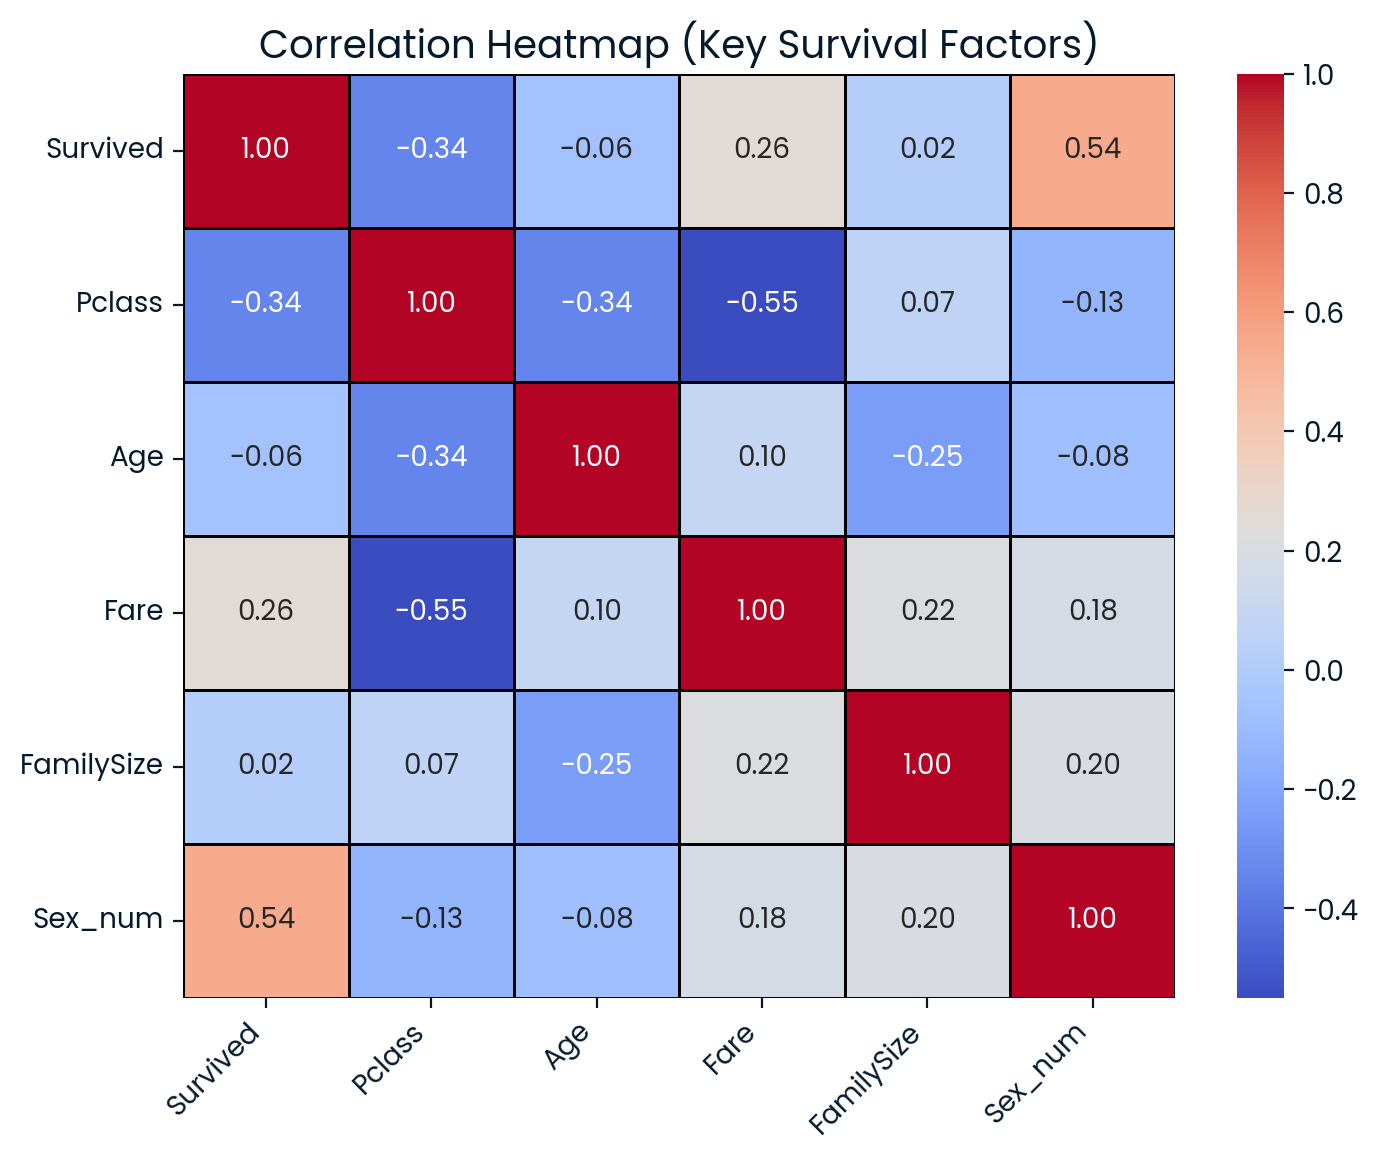

In [20]:
# Reload Titanic dataset fresh
df = pd.read_csv('Titanic Dataset.csv')

# Do the same cleaning steps quickly again
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('U').apply(lambda x: x[0])

# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Keep categorical version for plots
df['Sex_label'] = df['Sex']   # "male"/"female"

# Create numeric version for correlation
df['Sex_num'] = df['Sex'].map({'male': 0, 'female': 1, 'Male': 0, 'Female': 1})

print(df[['Sex','Sex_label','Sex_num']].head())

corr_cols = ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_num']

plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm',
            linewidths=0.5, linecolor='black', fmt='.2f')
plt.title("Correlation Heatmap (Key Survival Factors)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### 7. Gender + Class Interaction

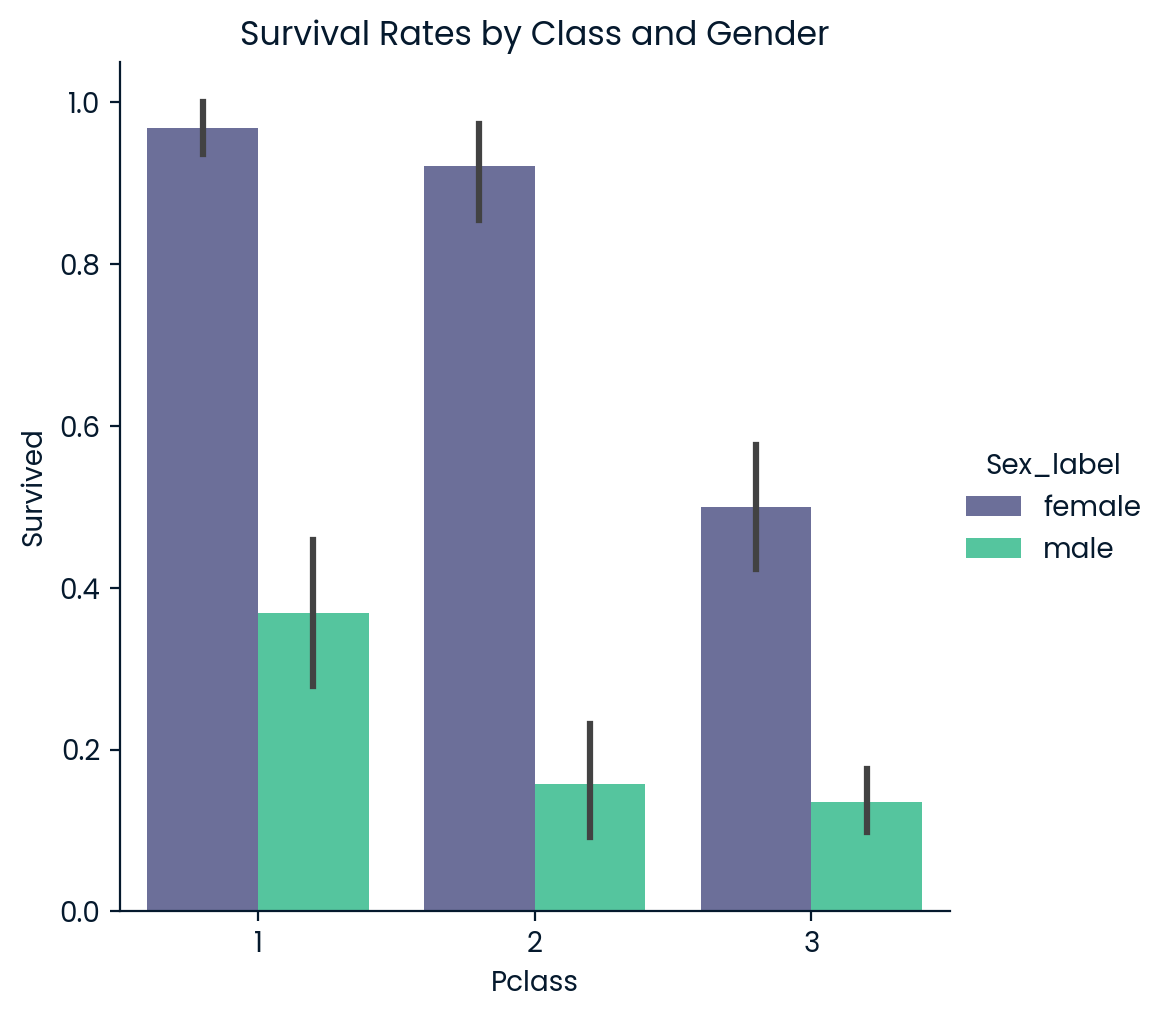

In [21]:
sns.catplot(x='Pclass', y='Survived', hue='Sex_label', kind='bar', data=df)
plt.title("Survival Rates by Class and Gender")
plt.show()


_Insight: Survival was highest for females, especially in 1st and 2nd class, while 3rd-class males faced the lowest survival chances. Gender and class together strongly determined survival likelihood._

### 8. Heatmap: Survival Rates (Gender vs Class)

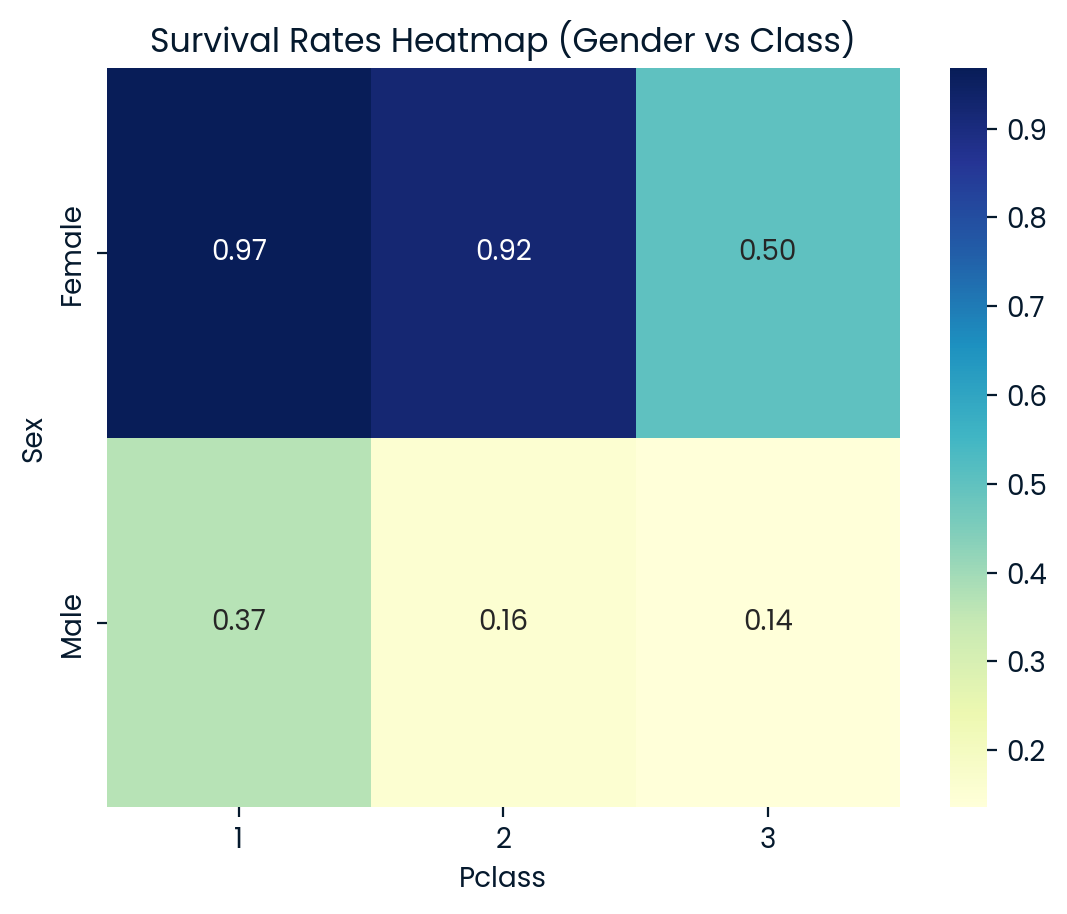

In [128]:
pivot = df.pivot_table(index='Sex', columns='Pclass', values='Survived')
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Survival Rates Heatmap (Gender vs Class)")
plt.show()


_Insight: This heatmap supports the historical notion that “women and children first” was practiced during the Titanic disaster, and it also emphasizes the inequities in survival chances across social classes. Higher-class females had the best chances of survival, while lower-class males had the worst._

# Executive Summary: Titanic EDA

Through exploratory analysis of the Titanic dataset, the following key insights were uncovered:

- **Gender & Survival:** Female passengers had a much higher survival rate (~74%) compared to males (~19%). Gender was the single strongest factor.
- **Class & Survival:** 1st-class passengers had a survival rate of ~63%, significantly higher than 3rd-class passengers (~24%). Wealth and social status strongly influenced survival chances.
- **Age & Survival:** Children (under ~12 years) were more likely to survive, reflecting the "women and children first" practice. Survival was lower among elderly passengers.
- **Fare & Survival:** Survivors generally paid higher fares, showing a strong link between higher-class tickets and survival.
- **Family Size & Survival:** Passengers with small family groups (2–4 members) had better chances of survival, while solo travelers and large families were less fortunate.
- **Combined Effects:** Survival was highest for **1st- and 2nd-class females**, while **3rd-class males** faced the worst odds.

📊 Overall, the analysis confirms both social and economic disparities in survival. Gender, class, and age were the most decisive factors, highlighting how privilege and vulnerability shaped outcomes during the disaster.
